In [3]:
import numpy as np
import pandas as pd
from datetime import datetime
import os
import logging
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
from datetime import datetime
import os
import logging
import matplotlib.pyplot as plt

In [5]:
# set the seeds so that we get the same initialization across different trials
seed_random = 1989

In [6]:

log_time = datetime.now().strftime("%d-%m-%Y_%H%M%S")


logging.basicConfig(filename='train_predictive_models_Masking.log',
                        format='%(asctime)s - %(message)s',
                        level=logging.INFO)
logging.info("Starting the experiemnt...")

antibitics_abx_list = ['NIT', 'SXT', 'CIP', 'LVX']
features_path ='../Data/all_uti_features.csv'
label_path='../Data/all_uti_resist_labels.csv'


In [7]:
# Load in data 
feature_df = pd.read_csv(features_path)
label_df = pd.read_csv(label_path)

In [8]:
feature_df.drop('example_id', inplace=True, axis=1)
feature_df

,demographics - age,demographics - is_white,demographics - is_veteran,micro - prev resistance LVX 14,micro - prev resistance AMP 14,micro - prev resistance CFZ 14,micro - prev resistance NIT 14,micro - prev resistance GEN 14,micro - prev resistance SXT 14,micro - prev resistance TET 14,...,selected micro - colonization pressure NIT 90 - overall,selected micro - colonization pressure OXA 90 - overall,selected micro - colonization pressure PEN 90 - overall,selected micro - colonization pressure SAM 90 - overall,selected micro - colonization pressure SXT 90 - overall,selected micro - colonization pressure TET 90 - overall,selected micro - colonization pressure TZP 90 - overall,selected micro - colonization pressure VAN 90 - overall,is_train,uncomplicated
0,54,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.24,0.56,0.49,0.38,0.26,0.37,0.06,0.13,0,0
1,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.19,0.78,0.83,0.33,0.20,0.35,0.18,0.13,1,0
2,89,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.21,0.66,0.51,0.50,0.25,0.37,0.05,0.12,1,0
3,49,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.23,0.47,0.50,0.25,0.26,0.35,0.06,0.12,1,0
4,21,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.24,0.50,0.49,0.33,0.25,0.37,0.05,0.10,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116897,66,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.24,0.49,0.54,0.33,0.25,0.35,0.09,0.10,1,0
116898,74,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.21,0.49,0.50,0.30,0.25,0.34,0.06,0.09,1,0
116899,48,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.21,0.51,0.51,0.28,0.23,0.34,0.05,0.10,1,1
116900,63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.18,0.52,0.57,0.38,0.27,0.35,0.06,0.12,0,0


In [9]:
label_df.drop('example_id', inplace=True, axis=1)
label_df

,NIT,SXT,CIP,LVX,is_train,uncomplicated
0,0.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0.0,1,0
2,0.0,0.0,1.0,1.0,1,0
3,0.0,0.0,0.0,0.0,1,0
4,0.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...
116897,1.0,1.0,1.0,1.0,1,0
116898,NaN,NaN,0.0,0.0,1,0
116899,0.0,0.0,0.0,0.0,1,1
116900,0.0,0.0,0.0,0.0,0,0


In [10]:
import random
os.environ['PYTHONHASHSEED'] = str(seed_random)
random.seed(seed_random)

In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
#kfold = KFold(n_splits=10, shuffle=True, random_state=1989)

In [12]:
from tensorflow.keras.layers import *

In [13]:
from numpy import dstack
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
tf.random.set_seed(seed_random)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

def build_conv1D_model(train_data_reshaped):
    n_timesteps = train_data_reshaped.shape[1] #13
    n_features  = train_data_reshaped.shape[2] #1 
    model = Sequential(name="model_conv1D")
    model.add(Input(shape=(n_timesteps,n_features)))
    #model.add(BatchNormalization(axis=1)
    model.add(Conv1D(filters=16, kernel_size=7, activation='relu', name="Conv1D_1"))
    model.add(Dropout(0.3))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))
    model.add(Dropout(0.3))
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', name="Conv1D_3"))
    model.add(Dropout(0.3))
    model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D"))
    model.add(Flatten())
    model.add(Dense(32, activation='relu', name="Dense_1"))
    model.add(Dense(4, activation='sigmoid', name="Dense_2"))

    return model


In [14]:
tf.config.run_functions_eagerly(True)
#tf.enable_eager_execution()
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Flatten, Conv1D

from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import backend as K
import uuid

def add_pos_2(input,nb):
    input_pos_encoding = tf.constant(nb, shape=[input.shape[1]], dtype="int32")/input.shape[1]
    input_pos_encoding = tf.cast(tf.reshape(input_pos_encoding, [1,10]),tf.float32)
    input = tf.add(input ,input_pos_encoding)
    return input

def transformer_encoder(inputs,key_dim,num_heads):
    dropout=0.3
    # Normalization and Attention
    print("transformer_encoder",inputs.shape)
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=key_dim, num_heads=num_heads
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Dense(key_dim, activation='softmax')(x)
    return x + res

def stack_block_transformer_spatial(num_transformer_blocks,featurelength,x):
  for _ in range(num_transformer_blocks):
      x = transformer_encoder(x,featurelength,2)
  x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)

  return x


In [15]:
def Tranfomer_Model(train_data_reshaped):
    num_transformer_blocks=1
    n_features = train_data_reshaped.shape[1] #13
    feature_length  = train_data_reshaped.shape[2] #1 
    input=Input(shape=(n_features,feature_length))
    x=input
    x = stack_block_transformer_spatial(num_transformer_blocks,n_features*feature_length, x)
    
    x = Dropout(0.3)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    #x = layers.Dense(20, activation='selu')(x)
    #x = Dropout(0.1)(x)
    output = layers.Dense(4, activation='sigmoid')(x)
  
    model = Model(input, output)
    #opt = optimizers.RMSprop(lr=0.001)
    #model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'],experimental_run_tf_function=False)
    #print(model.summary())
    return model

In [16]:
from tensorflow.keras.layers import *

Extract Train and Test set baselabel

In [17]:
train_feature_df=(feature_df.loc[feature_df['is_train'] == 1]).loc[feature_df['uncomplicated'] == 1]
test_feature_df=(feature_df.loc[feature_df['is_train'] == 0]).loc[feature_df['uncomplicated'] == 1]
train_label_df=(label_df.loc[label_df['is_train'] == 1]).loc[feature_df['uncomplicated'] == 1]
test_label_df=(label_df.loc[label_df['is_train'] == 0]).loc[feature_df['uncomplicated'] == 1]

In [18]:
train_feature_df.drop(['uncomplicated','is_train'], inplace=True, axis=1)
test_feature_df.drop(['uncomplicated','is_train'], inplace=True, axis=1)

In [19]:
train_feature_df.shape

(11865, 788)

Imputing Missing values with 0

In [20]:
train_feature_df=train_feature_df.fillna(0)
train_label_df[antibitics_abx_list]=train_label_df[antibitics_abx_list].fillna(-1)
test_feature_df=test_feature_df.fillna(0)
test_label_df[antibitics_abx_list]=test_label_df[antibitics_abx_list].fillna(-1)

array([[<AxesSubplot:title={'center':'NIT'}>,
        <AxesSubplot:title={'center':'SXT'}>],
       [<AxesSubplot:title={'center':'CIP'}>,
        <AxesSubplot:title={'center':'LVX'}>]], dtype=object)

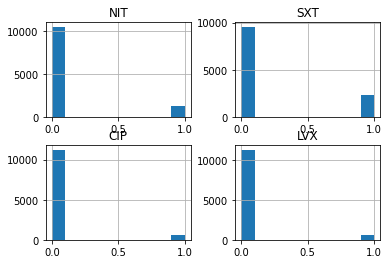

In [19]:
import matplotlib.pyplot as plt
train_label_df[antibitics_abx_list].hist()

In [20]:
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metric(history, labels, n,metrics):
  # Use a log scale to show the wide range of values.
  for metric in metrics:
        plt.semilogy(history.epoch, history.history[metric],
                color=colors[n], label='Train '+labels[n])
        plt.semilogy(history.epoch, history.history['val_'+metric],
                color=colors[n], label='Val '+labels[n],
                linestyle="--")
        n=n+1
  plt.xlabel('Epoch')
  plt.ylabel('Metrics')

  plt.legend()
  plt.savefig('output/'+'Plot_Default_'.join(labels)+'.png')

In [21]:
from tensorflow.keras import backend as K


In [22]:
mask_value=-1
#model_threshold=0.5

In [23]:
def masked_accuracy(y_true, y_pred, model_threshold=0.5):
    dtype = K.floatx()
    total = K.sum(K.cast(K.not_equal(y_true, mask_value), dtype))
    #total=K.cast(len(y_true),dtype)
    #correct = K.sum(K.cast(K.equal(y_true, K.round(y_pred)), dtype))
    correct = K.sum(K.cast(K.greater(K.clip(y_pred, 0, 1), model_threshold), dtype))
    #print(correct,total)
    return correct / total

In [24]:
def masked_loss_function(y_true, y_pred):
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    #print(mask)
    return K.binary_crossentropy(y_true * mask, y_pred * mask)

In [25]:
def masked_f1(y_true, y_pred, model_threshold=0.5):
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    dtype = K.floatx()
    def recall_m(y_true, y_pred):
        #TP = K.sum(K.round(K.clip(y_true * y_pred*mask, 0, 1)))
        #Positives = K.sum(K.round(K.clip(y_true*mask, 0, 1)))
        TP=K.sum(K.cast(K.greater(K.clip(y_true * y_pred *mask, 0, 1), model_threshold), dtype) )
        Positives=K.sum(K.cast(K.greater(K.clip(y_true *mask, 0, 1), model_threshold), dtype) )

        recall = TP / (Positives+K.epsilon())    
        return recall 


    def precision_m(y_true, y_pred):
        #TP = K.sum(K.round(K.clip(y_true * y_pred *mask, 0, 1)))
        #Pred_Positives = K.sum(K.round(K.clip(y_pred*mask, 0, 1)))
        TP=K.sum(K.cast(K.greater(K.clip(y_true * y_pred *mask, 0, 1), model_threshold), dtype ))
        Pred_Positives=K.sum(K.cast(K.greater(K.clip(y_pred *mask, 0, 1), model_threshold),dtype))
    
        precision = TP / (Pred_Positives+K.epsilon())
        return precision 

    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon()))
  

In [26]:
def masked_f1_loss(y_true, y_pred):
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    tp = tf.reduce_sum(y_true*y_pred*mask, axis=0)
    tn = tf.reduce_sum((1-y_true)*(1-y_pred)*mask, axis=0)
    fp = tf.reduce_sum((1-y_true)*y_pred*mask, axis=0)
    fn = tf.reduce_sum(y_true*(1-y_pred)*mask, axis=0)

    soft_f1= 2 * tp / (2*tp+fn+fp+K.epsilon())

    return 1 - soft_f1

In [27]:
def masked_precision(y_true, y_pred, model_threshold=0.5):
    dtype = K.floatx()
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    #TP = K.sum(K.round(K.clip(y_true * y_pred *mask, 0, 1)))
    TP=K.sum(K.cast(K.greater(K.clip(y_true * y_pred *mask, 0, 1), model_threshold), dtype ))
    #Pred_Positives = K.sum(K.round(K.clip(y_pred*mask, 0, 1)))
    Pred_Positives=K.sum(K.cast(K.greater(K.clip(y_pred *mask, 0, 1), model_threshold),dtype))
    precision = TP / (Pred_Positives+K.epsilon())
    return precision 

In [28]:
def masked_recall(y_true, y_pred, model_threshold=0.5):
    dtype = K.floatx()
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    #TP = K.sum(K.round(K.clip(y_true * y_pred*mask, 0, 1)))
    TP=K.sum(K.cast(K.greater(K.clip(y_true * y_pred *mask, 0, 1), model_threshold), dtype) )
    #Positives = K.sum(K.round(K.clip(y_true*mask, 0, 1)))
    Positives=K.sum(K.cast(K.greater(K.clip(y_true *mask, 0, 1), model_threshold), dtype) )
    
    recall = TP / (Positives+K.epsilon())    
    return recall 

In [29]:
def masked_specificity(y_true, y_pred, model_threshold=0.5):
    dtype = K.floatx()
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    #TP = K.sum(K.round(K.clip(y_true * y_pred*mask, 0, 1)))
    FP=K.sum(K.cast(K.greater(K.clip((1-y_true) * y_pred *mask, 0, 1), model_threshold),dtype) )
    #Positives = K.sum(K.round(K.clip(y_true*mask, 0, 1)))
    TN=K.sum(K.cast(K.greater(K.clip((1-y_true)*(1-y_pred) *mask, 0, 1), model_threshold),dtype) )
    
    recall = TN / (TN+FP+K.epsilon())    
    return recall 

In [30]:
def masked_AUC(y_true, y_pred):
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    m = tf.keras.metrics.AUC()
    m.update_state(y_true*mask, y_pred*mask)
    return m.result().numpy()

In [31]:
#thresholds = [0.2,0.3,0.4,0.5,0.6, 0.7,0.8]

METRICS = [
      masked_accuracy,
      masked_precision,
      masked_recall,
      masked_specificity,
      masked_f1,
      masked_AUC
      #[tf.keras.metrics.BinaryAccuracy(name=f'BiAccuracy+{thr}',threshold=thr) for thr in thresholds],
      #[tf.keras.metrics.Precision(name=f'precision+{thr}',thresholds=thr) for thr in thresholds],
      #[tf.keras.metrics.Recall(name=f'recall_+{thr}',thresholds=thr) for thr in thresholds],
      #tf.keras.metrics.AUC(name='auc'),
      #f1
]

In [32]:
EPOCHS = 100
BATCH_SIZE = 32

es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=10,
    mode='min',
    restore_best_weights=True)

In [33]:

from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax
from matplotlib import pyplot

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
def get_threshold( val_label, val_predict, label_count=4):
    partitions=250
    ThreholdList=[]
    for la in range(label_count):
        Threshold=[]
        sensitivity_val=[]
        specificity_val=[]
        accuracy_val=[]
        Gmean=[]
        f1_val=[]
        Index=[]
        for i in range (5, partitions-5):
            sensi=masked_recall(val_label.values[:, la], val_predict[:, la], i/partitions)
            speci=masked_specificity(val_label.values[:, la], val_predict[:, la], i/partitions)
            Threshold.append(i/partitions)
            accuracy_val.append(masked_accuracy(val_label.values[:, la], val_predict[:, la], i/partitions))
            sensitivity_val.append(sensi)
            Gmean.append(speci*sensi)
            specificity_val.append(speci)
            f1=masked_f1(val_label.values[:, la], val_predict[:, la], i/partitions)
            f1_val.append(f1)
            Index.append(f1+speci*sensi)
        ix = argmax(Index)
        print(Threshold[ix])
        ThreholdList.append(Threshold[ix])
        
        plt.plot(Threshold,accuracy_val, c='r', label = "Accuracy")
        plt.plot(Threshold,sensitivity_val, c='g', label = "Sensitivity")
        plt.plot(Threshold,specificity_val, c='b', label = "Specificity")
        plt.plot(Threshold,f1_val, c='C0', label = "F1 score")
        plt.plot(Threshold,Gmean, c='k', label = "Gmeans")
        plt.plot(Threshold,Index, c='m', label = "Index")
        plt.legend()
        plt.show()
    return ThreholdList


Epoch 1/100
  1/316 [..............................] - ETA: 33s - loss: 0.8713 - masked_accuracy: 0.4766 - masked_precision: 0.1148 - masked_recall: 0.7000 - masked_specificity: 0.5424 - masked_f1: 0.1972 - masked_AUC: 0.6000

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


315/316 [============================>.] - ETA: 0s - loss: 0.8221 - masked_accuracy: 0.9399 - masked_precision: 0.1087 - masked_recall: 0.9777 - masked_specificity: 0.0641 - masked_f1: 0.1939 - masked_AUC: 0.6996 - ETA: 21s - loss: 0.8239 - masked_accuracy: 0.8925 - masked_precision: 0.1155 - masked_recall: 0.9297 - masked_specificity: 0.1117 - masked_f1: 0.2038 - masked_ - ETA: 21s - loss: 0.8259 - masked_accuracy: 0.9099 - masked_precision: 0.1121 - masked_recall: 0.9411 - masked_specificity: - ETA: 17s - loss: 0.8239 - masked_accuracy: 0.9472 - masked_precision: 0.1089 - masked_recall: 0.9655 - masked_specificity: 0 - ETA: 13s - loss: 0.8219 - masked_accuracy: 0.9622 - masked_precision: 0.1081 - masked_recall: 0.9753 - masked_specificity: 0.0393 - masked_f1: 0.1927 - masked_AUC: 0.6 - ETA: 13s - loss: 0.8219 - masked_accuracy: 0.9629 - masked_precision: 0.1079 - masked_recall: 0.9757 - masked_specificity: 0.0386 - masked_f1: 0.1925 - masked_AUC - ETA: 12s - loss: 0.8219 - masked_acc

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


316/316 [==============================] - 30s 94ms/step - loss: 0.8220 - masked_accuracy: 0.9390 - masked_precision: 0.1096 - masked_recall: 0.9769 - masked_specificity: 0.0651 - masked_f1: 0.1948 - masked_AUC: 0.6992 - val_loss: 0.8266 - val_masked_accuracy: 0.6621 - val_masked_precision: 0.1291 - val_masked_recall: 0.8933 - val_masked_specificity: 0.3614 - val_masked_f1: 0.2228 - val_masked_AUC: 0.7090
Epoch 2/100
316/316 [==============================] - 29s 93ms/step - loss: 0.7953 - masked_accuracy: 0.5641 - masked_precision: 0.1535 - masked_recall: 0.8422 - masked_specificity: 0.4669 - masked_f1: 0.2564 - masked_AUC: 0.7030 - val_loss: 0.8009 - val_masked_accuracy: 0.5510 - val_masked_precision: 0.1443 - val_masked_recall: 0.8435 - val_masked_specificity: 0.4778 - val_masked_f1: 0.2432 - val_masked_AUC: 0.7037
Epoch 3/100
316/316 [==============================] - 29s 93ms/step - loss: 0.7802 - masked_accuracy: 0.5414 - masked_precision: 0.1581 - masked_recall: 0.8357 - masked_

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.8007231950759888, 0.40415826439857483, 0.17442815005779266, 0.6617814898490906, 0.6260865330696106, 0.27186378836631775, 0.6734051704406738]


C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


0.02


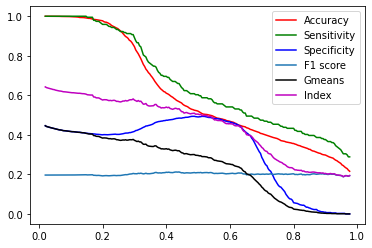

0.02


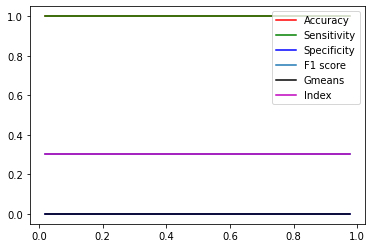

0.292


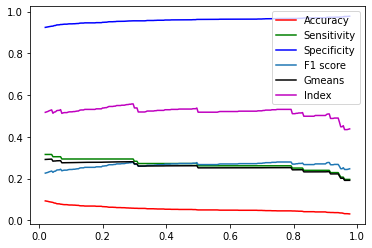

0.38


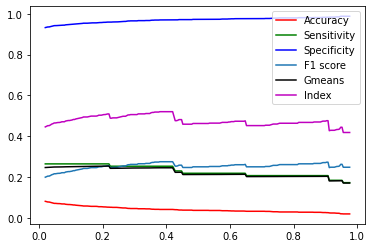

0.23699568


ValueError: operands could not be broadcast together with shapes (3941,4) (1780,4) 

In [122]:
x_train_tfidf, x_val_tfidf, y_train_tfidf, y_val_tfidf = train_test_split(train_feature_df, train_label_df[antibitics_abx_list], test_size=0.15, random_state=1989)

x_train_tfidf=x_train_tfidf.reset_index(drop=True)
y_train_tfidf=y_train_tfidf.reset_index(drop=True)
x_val_tfidf=x_val_tfidf.reset_index(drop=True)
y_val_tfidf=y_val_tfidf.reset_index(drop=True)
sample_size = x_train_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_train_tfidf.values.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number
train_data_reshaped = x_train_tfidf.values.reshape(sample_size,time_steps,input_dimension)
  
sample_size = x_val_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_val_tfidf.values.shape[1] # number of features in train set

x_val_reshaped = x_val_tfidf.values.reshape(sample_size,time_steps,input_dimension)

x_test_tfidf=test_feature_df.reset_index(drop=True)
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
sample_size = x_test_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_test_tfidf.values.shape[1] # number of features in train set
test_data_reshaped =x_test_tfidf.values.reshape(sample_size,time_steps,input_dimension)

   
model=build_conv1D_model(train_data_reshaped)
model.compile(loss=masked_f1_loss,
            optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
            metrics=METRICS)
    
history = model.fit(train_data_reshaped, y_train_tfidf, epochs=EPOCHS,validation_data=(x_val_reshaped, y_val_tfidf), callbacks=[es], verbose=1)
results = model.evaluate(test_data_reshaped, y_test_tfidf, verbose=0)
print (results)
model.save('../output/1DCNN_Model_UnComplicated')
        
    
ypredict = model.predict(x_val_reshaped)
ytrain = model.predict(train_data_reshaped)
Threshold_list=get_threshold(y_val_tfidf, ypredict, label_count=4)
    
ypredictTest = model.predict(test_data_reshaped)
    
print(masked_accuracy(y_test_tfidf,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_precision(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_recall(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_specificity(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_f1(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())


In [123]:
ypredictTest = model.predict(test_data_reshaped)
    
print(masked_accuracy(y_test_tfidf,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_precision(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_recall(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_specificity(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_f1(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())

0.52569145
0.15590684
0.75511396
0.58486646
0.25845164


In [138]:
print(masked_AUC(y_test_tfidf.values,ypredictTest))

0.63944995


In [124]:
Threshold_list


[0.02, 0.02, 0.292, 0.38]

In [125]:
np.mean(Threshold_list)

0.178

In [79]:
#ma=masked_accuracy(y_val_tfidf,ypredict, model_threshold=np.mean(Threshold_list))
#ma.numpy()

In [80]:
logging.info('REsults {np.mean(accuracyresultlist),np.std(accuracyresultlist), np.mean(precisionresultlist),np.std(precisionresultlist), np.mean(recallresultlist), np.std(recallresultlist), np.mean(specificity), np.std(specificity), np.mean(auclist), np.std(auclist), np.mean(flist), np.std(flist)}')

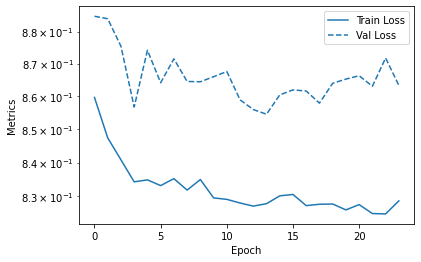

In [139]:
plot_metric(history, ['Loss',], 0,['loss'])

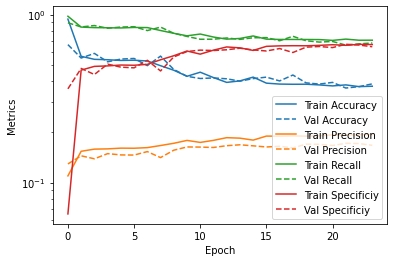

In [127]:
plot_metric(history, ['Accuracy', 'Precision','Recall', 'Specificiy'], 0,['masked_accuracy', 'masked_precision','masked_recall', 'masked_specificity'])

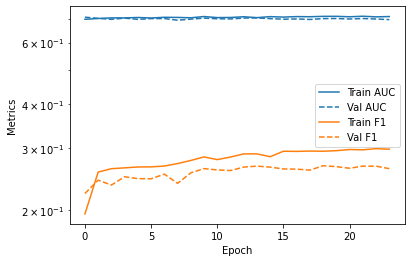

In [128]:
plot_metric(history, ['AUC', 'F1'], 0,['masked_AUC', 'masked_f1'])

Epoch 1/100
  1/316 [..............................] - ETA: 43s - loss: 0.6900 - masked_accuracy: 0.3438 - masked_precision: 0.0455 - masked_recall: 0.2000 - masked_specificity: 0.6441 - masked_f1: 0.0741 - masked_AUC: 0.3763

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


315/316 [============================>.] - ETA: 0s - loss: 0.3464 - masked_accuracy: 0.0027 - masked_precision: 0.0041 - masked_recall: 0.0020 - masked_specificity: 0.9973 - masked_f1: 0.0017 - masked_AUC: 0.6288 - ETA: 25s - loss: 0.6333 - masked_accuracy: 0.0597 - masked_precision: 0.0214 - masked_recall: 0.0381 - masked_specificity: 0.9382 - masked_f1: 0.0251 - masked_AUC: 0.395 - ETA: 25s - loss: 0.6297 - masked_accuracy: 0.0557 - masked_precision: 0.0200 - ma - ETA: 17s - los

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


316/316 [==============================] - 28s 89ms/step - loss: 0.3467 - masked_accuracy: 0.0027 - masked_precision: 0.0041 - masked_recall: 0.0020 - masked_specificity: 0.9973 - masked_f1: 0.0017 - masked_AUC: 0.6286 - val_loss: 0.3267 - val_masked_accuracy: 0.0000e+00 - val_masked_precision: 0.0000e+00 - val_masked_recall: 0.0000e+00 - val_masked_specificity: 1.0000 - val_masked_f1: 0.0000e+00 - val_masked_AUC: 0.6915
Epoch 2/100
316/316 [==============================] - 28s 89ms/step - loss: 0.3101 - masked_accuracy: 0.0011 - masked_precision: 0.0691 - masked_recall: 0.0057 - masked_specificity: 0.9995 - masked_f1: 0.0104 - masked_AUC: 0.7043 - val_loss: 0.3285 - val_masked_accuracy: 0.0028 - val_masked_precision: 0.1607 - val_masked_recall: 0.0212 - val_masked_specificity: 0.9987 - val_masked_f1: 0.0340 - val_masked_AUC: 0.7223 masked_f1:
Epoch 3/100
316/316 [==============================] - 29s 91ms/step - loss: 0.3041 - masked_accuracy: 0.0027 - masked_precision: 0.1498 - mask

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.32824331521987915, 0.009450605139136314, 0.28402453660964966, 0.04371054098010063, 0.994977593421936, 0.0719563439488411, 0.6972125768661499]


C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


0.068


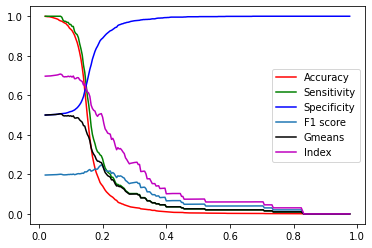

0.16


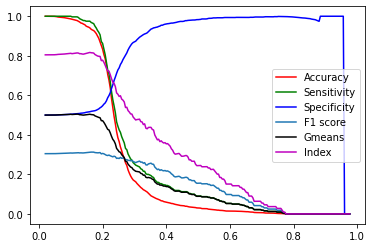

0.232


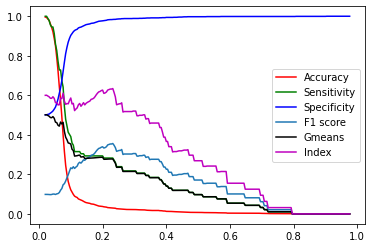

0.076


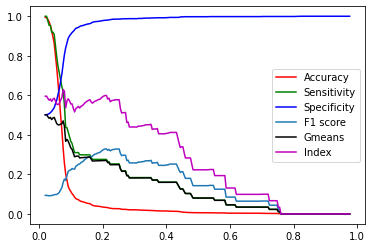

0.5996575
0.14344652
0.792519
0.63443047
0.24292365


In [130]:
x_train_tfidf, x_val_tfidf, y_train_tfidf, y_val_tfidf = train_test_split(train_feature_df, train_label_df[antibitics_abx_list], test_size=0.15, random_state=1989)

x_train_tfidf=x_train_tfidf.reset_index(drop=True)
y_train_tfidf=y_train_tfidf.reset_index(drop=True)
x_val_tfidf=x_val_tfidf.reset_index(drop=True)
y_val_tfidf=y_val_tfidf.reset_index(drop=True)
sample_size = x_train_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_train_tfidf.values.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number
train_data_reshaped = x_train_tfidf.values.reshape(sample_size,time_steps,input_dimension)
  
sample_size = x_val_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_val_tfidf.values.shape[1] # number of features in train set

x_val_reshaped = x_val_tfidf.values.reshape(sample_size,time_steps,input_dimension)

x_test_tfidf=test_feature_df.reset_index(drop=True)
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
sample_size = x_test_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_test_tfidf.values.shape[1] # number of features in train set
test_data_reshaped =x_test_tfidf.values.reshape(sample_size,time_steps,input_dimension)

   
model=build_conv1D_model(train_data_reshaped)
model.compile(loss=masked_loss_function,
            optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
            metrics=METRICS)
    
history = model.fit(train_data_reshaped, y_train_tfidf, epochs=EPOCHS,validation_data=(x_val_reshaped, y_val_tfidf), callbacks=[es], verbose=1)
results = model.evaluate(test_data_reshaped, y_test_tfidf, verbose=0)
print (results)
model.save('../output/1DCNN_Model_UnComplicated_BE')
        
    
ypredict = model.predict(x_val_reshaped)
ytrain = model.predict(train_data_reshaped)
Threshold_list=get_threshold(y_val_tfidf, ypredict, label_count=4)
    
ypredictTest = model.predict(test_data_reshaped)
    
print(masked_accuracy(y_test_tfidf,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_precision(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_recall(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_specificity(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_f1(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())


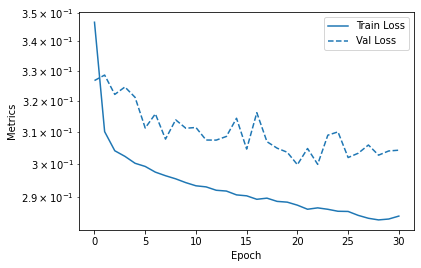

In [131]:
plot_metric(history, ['Loss',], 0,['loss',])

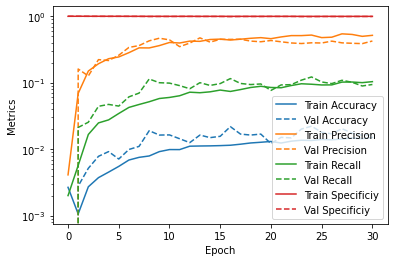

In [132]:
plot_metric(history, ['Accuracy', 'Precision','Recall', 'Specificiy'], 0,['masked_accuracy', 'masked_precision','masked_recall', 'masked_specificity'])

Transformer_1

In [36]:
x_train_tfidf, x_val_tfidf, y_train_tfidf, y_val_tfidf = train_test_split(train_feature_df, train_label_df[antibitics_abx_list], test_size=0.15, random_state=1989)

x_train_tfidf=x_train_tfidf.reset_index(drop=True)
y_train_tfidf=y_train_tfidf.reset_index(drop=True)
x_val_tfidf=x_val_tfidf.reset_index(drop=True)
y_val_tfidf=y_val_tfidf.reset_index(drop=True)
sample_size = x_train_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_train_tfidf.values.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number
train_data_reshaped = x_train_tfidf.values.reshape(sample_size,time_steps,input_dimension)
  
sample_size = x_val_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_val_tfidf.values.shape[1] # number of features in train set

x_val_reshaped = x_val_tfidf.values.reshape(sample_size,time_steps,input_dimension)

x_test_tfidf=test_feature_df.reset_index(drop=True)
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
sample_size = x_test_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_test_tfidf.values.shape[1] # number of features in train set
test_data_reshaped =x_test_tfidf.values.reshape(sample_size,time_steps,input_dimension)

   
model=Tranfomer_Model(train_data_reshaped)
model.compile(loss=masked_loss_function,
            optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
            metrics=METRICS)
    
history = model.fit(train_data_reshaped, y_train_tfidf, epochs=EPOCHS,validation_data=(x_val_reshaped, y_val_tfidf), callbacks=[es], verbose=1)
results = model.evaluate(test_data_reshaped, y_test_tfidf, verbose=0)
model.save('../output/Tranformer_Model_1_UnComplicated_BE')
        

ypredict = model.predict(x_val_reshaped)
ytrain = model.predict(train_data_reshaped)
Threshold_list=get_threshold(y_val_tfidf, ypredict, label_count=4)
    
ypredictTest = model.predict(test_data_reshaped)
    
print(masked_accuracy(y_test_tfidf,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_precision(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_recall(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_specificity(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_f1(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())


transformer_encoder (None, 788, 1)
Epoch 1/100


C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


  1/316 [..............................] - ETA: 15:05 - loss: 1.2141 - masked_accuracy: 0.6016 - masked_precision: 0.0779 - masked_recall: 0.6000 - masked_specificity: 0.3983 - masked_f1: 0.1379 - masked_AUC: 0.5305

KeyboardInterrupt: 

In [153]:
results

[0.3191094696521759,
 0.005355342756956816,
 0.16935484111309052,
 0.02757429890334606,
 0.9976180195808411,
 0.045285914093256,
 0.7035375237464905]

In [141]:
Threshold_list, np.mean(Threshold_list)

([0.068, 0.152, 0.028, 0.028], 0.069)

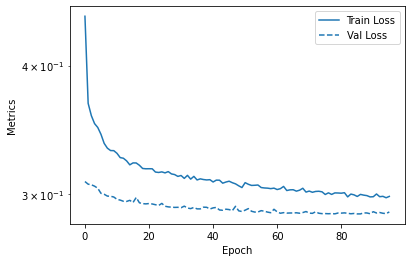

In [142]:
plot_metric(history, ['Loss'], 0,['loss'])

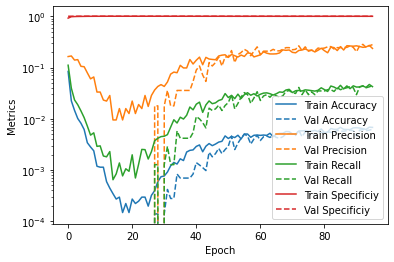

In [143]:
plot_metric(history, ['Accuracy', 'Precision','Recall', 'Specificiy'], 0,['masked_accuracy', 'masked_precision','masked_recall', 'masked_specificity'])

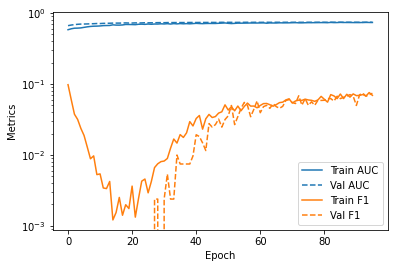

In [144]:
plot_metric(history, ['AUC', 'F1'], 0,['masked_AUC', 'masked_f1'])

In [145]:
x_train_tfidf, x_val_tfidf, y_train_tfidf, y_val_tfidf = train_test_split(train_feature_df, train_label_df[antibitics_abx_list], test_size=0.15, random_state=1989)

x_train_tfidf=x_train_tfidf.reset_index(drop=True)
y_train_tfidf=y_train_tfidf.reset_index(drop=True)
x_val_tfidf=x_val_tfidf.reset_index(drop=True)
y_val_tfidf=y_val_tfidf.reset_index(drop=True)
sample_size = x_train_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_train_tfidf.values.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number
train_data_reshaped = x_train_tfidf.values.reshape(sample_size,time_steps,input_dimension)
  
sample_size = x_val_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_val_tfidf.values.shape[1] # number of features in train set

x_val_reshaped = x_val_tfidf.values.reshape(sample_size,time_steps,input_dimension)

x_test_tfidf=test_feature_df.reset_index(drop=True)
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
sample_size = x_test_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_test_tfidf.values.shape[1] # number of features in train set
test_data_reshaped =x_test_tfidf.values.reshape(sample_size,time_steps,input_dimension)

   
model=Tranfomer_Model(train_data_reshaped)
model.compile(loss=masked_f1_loss,
            optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
            metrics=METRICS)
    
history = model.fit(train_data_reshaped, y_train_tfidf, epochs=EPOCHS,validation_data=(x_val_reshaped, y_val_tfidf), callbacks=[es], verbose=1)
results = model.evaluate(test_data_reshaped, y_test_tfidf, verbose=0)
model.save('../output/Tranformer_Model_1_UnComplicated_BE')
        

ypredict = model.predict(x_val_reshaped)
ytrain = model.predict(train_data_reshaped)
Threshold_list=get_threshold(y_val_tfidf, ypredict, label_count=4)
    
ypredictTest = model.predict(test_data_reshaped)
    
print(masked_accuracy(y_test_tfidf,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_precision(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_recall(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_specificity(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_f1(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())


transformer_encoder (None, 788, 1)
Epoch 1/100


C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


316/316 [==============================] - ETA: 0s - loss: 0.8275 - masked_accuracy: 0.7844 - masked_precision: 0.1127 - masked_recall: 0.8505 - masked_specificity: 0.2230 - masked_f1: 0.1967 - masked_AUC: 0.5759

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


316/316 [==============================] - 950s 3s/step - loss: 0.8275 - masked_accuracy: 0.7844 - masked_precision: 0.1127 - masked_recall: 0.8505 - masked_specificity: 0.2230 - masked_f1: 0.1967 - masked_AUC: 0.5759 - val_loss: 0.8338 - val_masked_accuracy: 0.7948 - val_masked_precision: 0.1082 - val_masked_recall: 0.9008 - val_masked_specificity: 0.2148 - val_masked_f1: 0.1910 - val_masked_AUC: 0.6650
Epoch 2/100
316/316 [==============================] - 958s 3s/step - loss: 0.8224 - masked_accuracy: 0.8901 - masked_precision: 0.1101 - masked_recall: 0.9434 - masked_specificity: 0.1156 - masked_f1: 0.1954 - masked_AUC: 0.6095 - val_loss: 0.8310 - val_masked_accuracy: 1.0000 - val_masked_precision: 0.0972 - val_masked_recall: 1.0000 - val_masked_specificity: 0.0000e+00 - val_masked_f1: 0.1755 - val_masked_AUC: 0.6542
Epoch 3/100
316/316 [==============================] - 957s 3s/step - loss: 0.8209 - masked_accuracy: 0.9650 - masked_precision: 0.1061 - masked_recall: 0.9834 - masked

KeyboardInterrupt: 

0.02


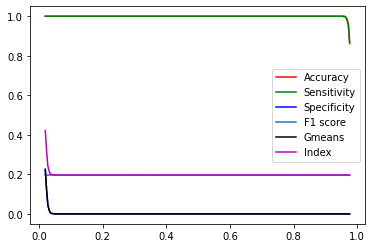

0.02


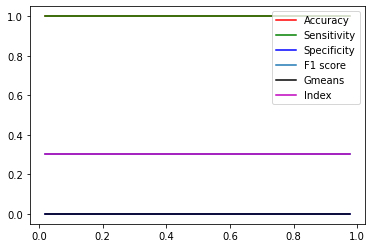

0.716


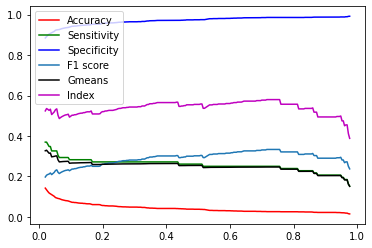

0.772


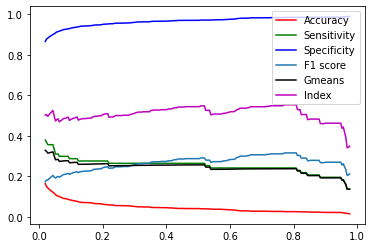

KeyboardInterrupt: 

In [148]:
ypredict = model.predict(x_val_reshaped)
ytrain = model.predict(train_data_reshaped)
Threshold_list=get_threshold(y_val_tfidf, ypredict, label_count=4)
    
ypredictTest = model.predict(test_data_reshaped)
    
print(masked_accuracy(y_test_tfidf,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_precision(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_recall(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_specificity(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_f1(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())


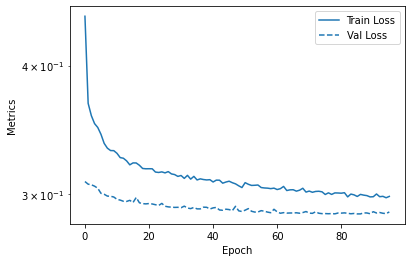

In [150]:
plot_metric(history, ['Loss'], 0,['loss'])

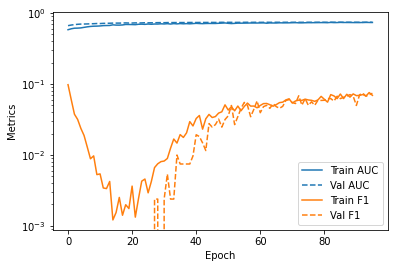

In [149]:
plot_metric(history, ['AUC', 'F1'], 0,['masked_AUC', 'masked_f1'])

In [1]:
from tensorflow.keras import layers, models
def ResNet_1D_CNN(train_data_reshaped,n_feature_maps, nb_classes):
    n_timesteps = train_data_reshaped.shape[1] #13
    n_features  = train_data_reshaped.shape[2] #1 
    print ('build conv_x')
    x = layers.Input(shape=(n_timesteps,n_features))
    conv_x = layers.BatchNormalization()(x)
    conv_x = layers.Conv1D(filters=n_feature_maps, kernel_size=7, activation='relu', padding='same')(conv_x)
    conv_x = layers.BatchNormalization()(conv_x)
    #conv_x = layers.Activation('relu')(conv_x)
    conv_x =layers.Dropout(0.3) (conv_x)

    print ('build conv_y')
    conv_y = layers.Conv1D(filters=n_feature_maps, kernel_size=3, activation='relu', padding='same')(conv_x)
    conv_y = layers.BatchNormalization()(conv_y)
    #conv_y = layers.Activation('relu')(conv_y)
    conv_y =layers.Dropout(0.3) (conv_y)
     
    print ('build conv_z')
    conv_z = layers.Conv1D(filters=n_feature_maps, kernel_size=2, activation='relu', padding='same')(conv_y)
    conv_z = layers.BatchNormalization()(conv_z)
    conv_z =layers.Dropout(0.3) (conv_z)
     
    is_expand_channels = not (n_features == n_feature_maps)
    if is_expand_channels:
        print ('Not equal')
        shortcut_y = layers.Conv1D(n_feature_maps, 1, 1,padding='same')(x)
        shortcut_y = layers.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = layers.BatchNormalization()(x)
    print ('Merging skip connection')
    y = layers.Add()([shortcut_y, conv_z])
    y = layers.Activation('relu')(y)
     
    #print ('build conv_x')
    x1 = y
    conv_x = layers.Conv1D(filters=n_feature_maps*2, kernel_size=7, activation='relu', padding='same')(x1)
    conv_x = layers.BatchNormalization()(conv_x)
    #conv_x = layers.Activation('relu')(conv_x)
    conv_x =layers.Dropout(0.5) (conv_x)
     
    print ('build conv_y')
    conv_y = layers.Conv1D(filters=n_feature_maps*2, kernel_size=3, activation='relu', padding='same')(conv_x)
    conv_y = layers.BatchNormalization()(conv_y)
    #conv_y = layers.Activation('relu')(conv_y)
    conv_y =layers.Dropout(0.3) (conv_y)
    
    print ('build conv_z')
    conv_z = layers.Conv1D(filters=n_feature_maps*2, kernel_size=2, activation='relu', padding='same')(conv_y)
    conv_z = layers.BatchNormalization()(conv_z)
    conv_z =layers.Dropout(0.3) (conv_z)

    is_expand_channels = not (n_features == n_feature_maps*2)
    if is_expand_channels:
        print( 'Expanded_2')
        shortcut_y = layers.Conv1D(n_feature_maps*2, 1, 1,padding='same')(x1)
        shortcut_y = layers.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = layers.BatchNormalization()(x1)
    print ('Merging skip connection')
    y = layers.Add()([shortcut_y, conv_z])
    y = layers.Activation('relu')(y)
    '''
    print ('build conv_x')
    x1 = y
    conv_x = layers.Conv1D(n_feature_maps*2, 8, 1, padding='same')(x1)
    conv_x = layers.BatchNormalization()(conv_x)
    conv_x = layers.Activation('relu')(conv_x)
     
    print ('build conv_y')
    conv_y = layers.Conv1D(n_feature_maps*2, 5, 1, padding='same')(conv_x)
    conv_y = layers.BatchNormalization()(conv_y)
    conv_y = layers.Activation('relu')(conv_y)
     
    print ('build conv_z')
    conv_z = layers.Conv1D(n_feature_maps*2, 3, 1, padding='same')(conv_y)
    conv_z = layers.BatchNormalization()(conv_z)

    is_expand_channels = not (n_features == n_feature_maps*2)
    if is_expand_channels:
        print ('Exapnd 3')
        shortcut_y = layers.Conv1D(n_feature_maps*2, 1, 1,padding='same')(x1)
        shortcut_y = layers.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = layers.BatchNormalization()(x1)
    print ('Merging skip connection')
    y = layers.Add()([shortcut_y, conv_z])
    y = layers.Activation('relu')(y)
    '''
    full = layers.GlobalAveragePooling1D()(y)
    full = layers.Flatten()(full)
    full = layers.Dense(32, activation='relu', name="Dense_1")(full)
    out =  layers.Dense(nb_classes, activation='softmax')(full)
    #print ('        -- model was built.')
    #return x, out
    return tf.keras.Model(inputs=x, outputs=out)

c:\Users\mt01034\Anaconda3\envs\tf-env\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\mt01034\Anaconda3\envs\tf-env\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\Users\mt01034\Anaconda3\envs\tf-env\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [21]:
x_train_tfidf, x_val_tfidf, y_train_tfidf, y_val_tfidf = train_test_split(train_feature_df, train_label_df[antibitics_abx_list], test_size=0.15, random_state=1989)

x_train_tfidf=x_train_tfidf.reset_index(drop=True)
y_train_tfidf=y_train_tfidf.reset_index(drop=True)
x_val_tfidf=x_val_tfidf.reset_index(drop=True)
y_val_tfidf=y_val_tfidf.reset_index(drop=True)
sample_size = x_train_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_train_tfidf.values.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number
train_data_reshaped = x_train_tfidf.values.reshape(sample_size,time_steps,input_dimension)

In [22]:
   
model=ResNet_1D_CNN(train_data_reshaped,64,4)

build conv_x
build conv_y
build conv_z
Not equal
Merging skip connection
build conv_y
build conv_z
Expanded_2
Merging skip connection


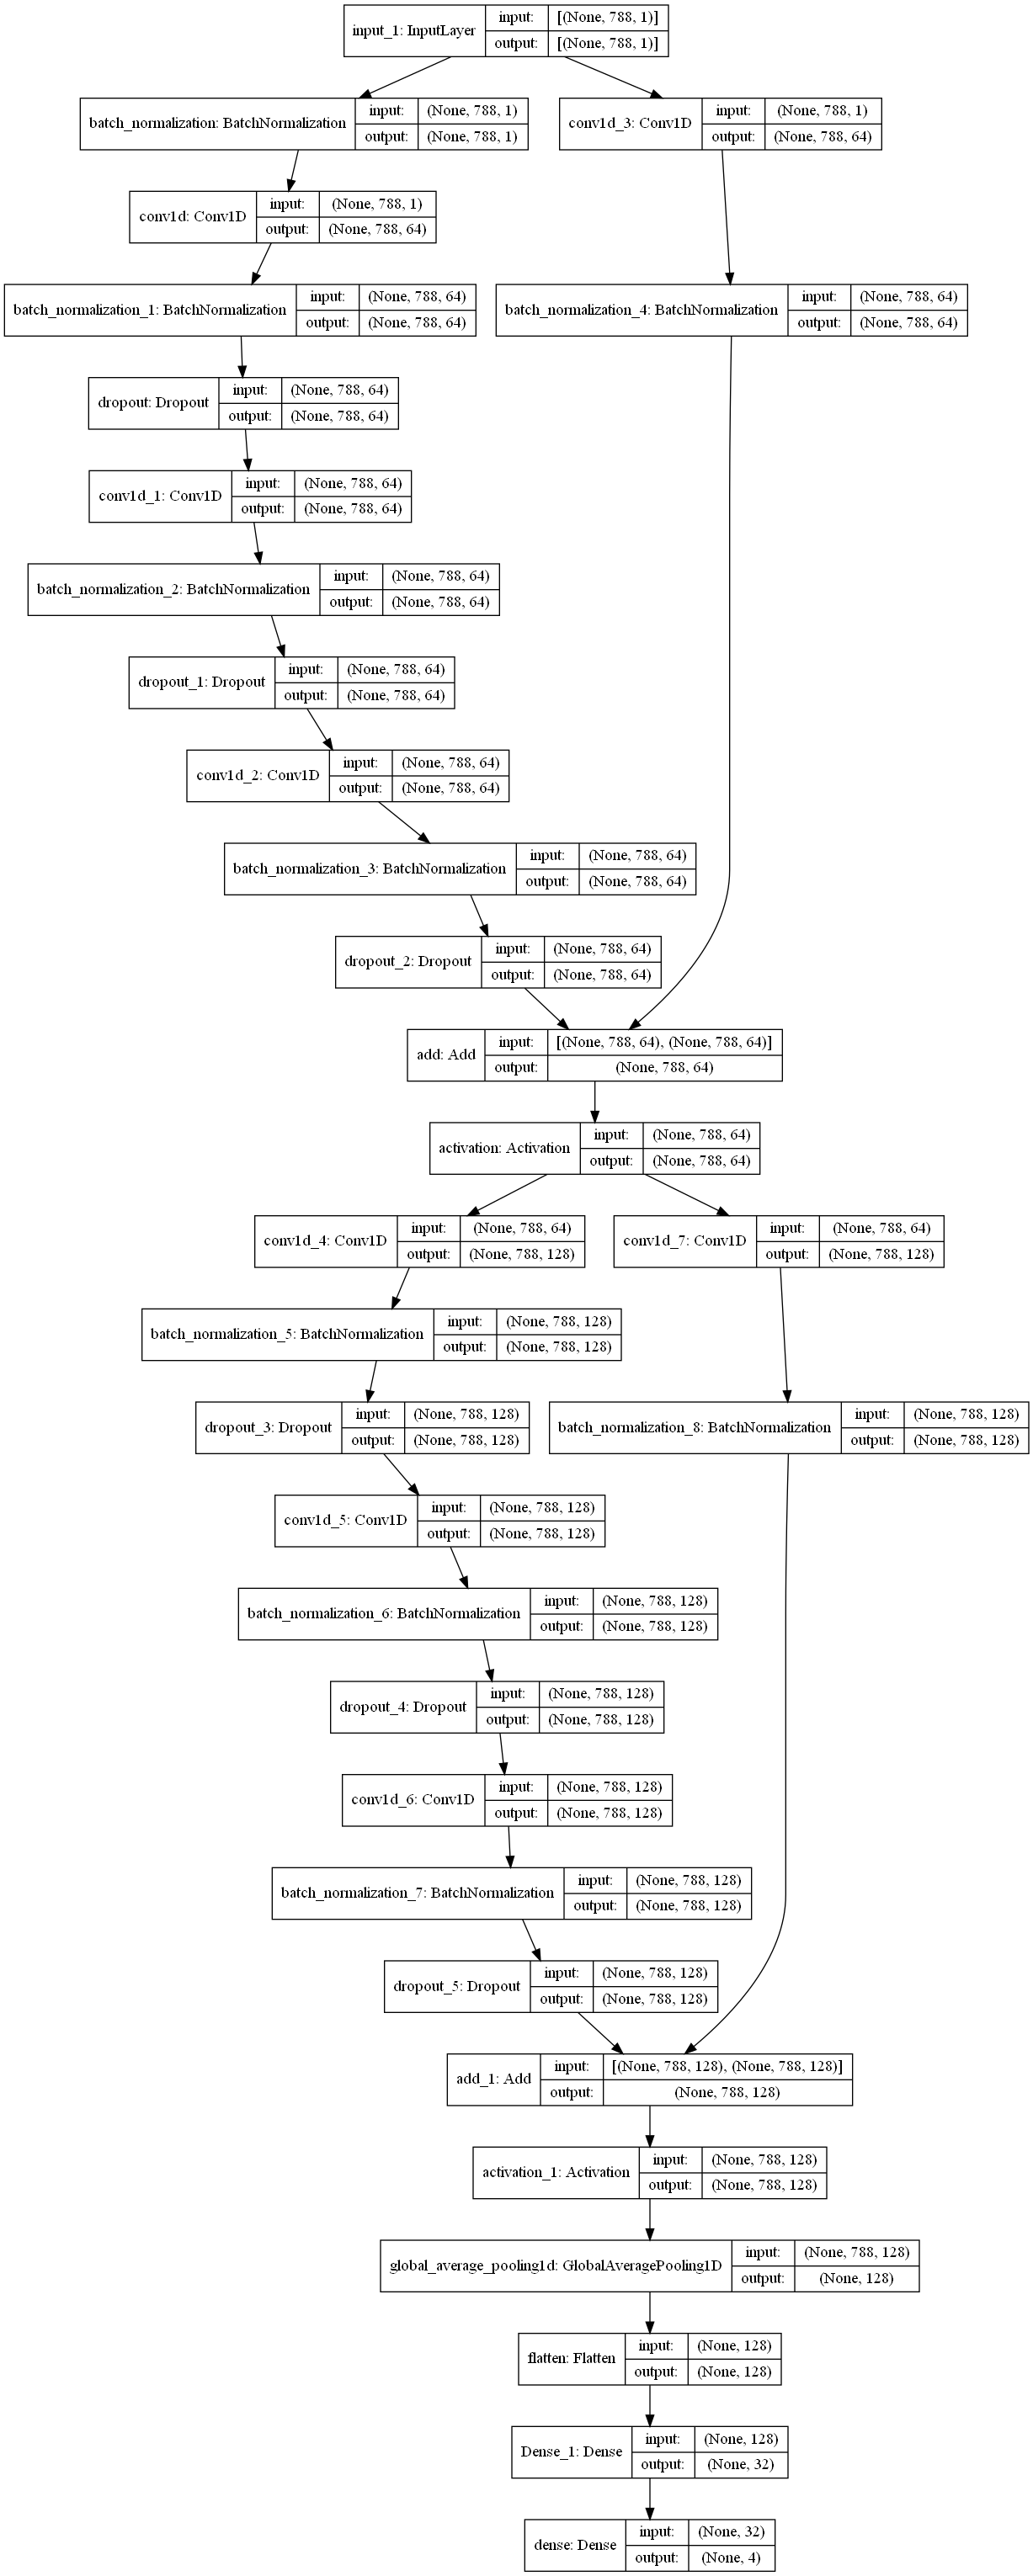

In [23]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
#SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='Trasformer_model.png')
#plot_model(model, show_shapes=True, show_layer_names=True)

build conv_x
build conv_y
build conv_z
Not equal
Merging skip connection
build conv_y
build conv_z
Expanded_2
Merging skip connection
Epoch 1/100


C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


316/316 [==============================] - ETA: 0s - loss: 0.3882 - masked_accuracy: 0.0000e+00 - masked_precision: 0.0000e+00 - masked_recall: 0.0000e+00 - masked_specificity: 1.0000 - masked_f1: 0.0000e+00 - masked_AUC: 0.6764

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


316/316 [==============================] - 315s 996ms/step - loss: 0.3882 - masked_accuracy: 0.0000e+00 - masked_precision: 0.0000e+00 - masked_recall: 0.0000e+00 - masked_specificity: 1.0000 - masked_f1: 0.0000e+00 - masked_AUC: 0.6764 - val_loss: 0.3832 - val_masked_accuracy: 0.0000e+00 - val_masked_precision: 0.0000e+00 - val_masked_recall: 0.0000e+00 - val_masked_specificity: 1.0000 - val_masked_f1: 0.0000e+00 - val_masked_AUC: 0.6700
Epoch 2/100
316/316 [==============================] - 314s 994ms/step - loss: 0.3873 - masked_accuracy: 0.0000e+00 - masked_precision: 0.0000e+00 - masked_recall: 0.0000e+00 - masked_specificity: 1.0000 - masked_f1: 0.0000e+00 - masked_AUC: 0.6856 - val_loss: 0.3833 - val_masked_accuracy: 0.0000e+00 - val_masked_precision: 0.0000e+00 - val_masked_recall: 0.0000e+00 - val_masked_specificity: 1.0000 - val_masked_f1: 0.0000e+00 - val_masked_AUC: 0.6728
Epoch 3/100
316/316 [==============================] - 313s 990ms/step - loss: 0.3872 - masked_accurac

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.39603543281555176, 0.0, 0.0, 0.0, 1.0, 0.0, 0.659814715385437]


C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


0.02


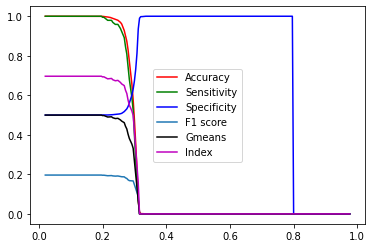

0.356


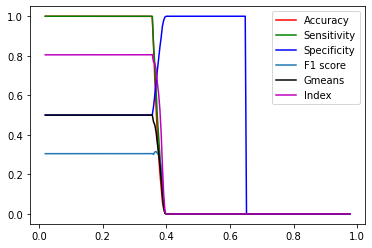

0.156


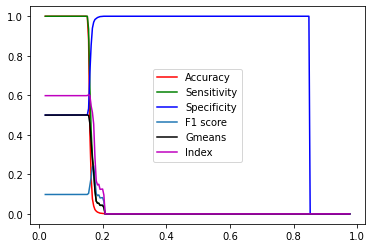

0.168


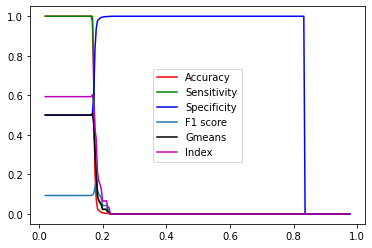

0.9792565
0.10960679
0.98889536
0.50553995
0.19734077


In [154]:
x_train_tfidf, x_val_tfidf, y_train_tfidf, y_val_tfidf = train_test_split(train_feature_df, train_label_df[antibitics_abx_list], test_size=0.15, random_state=1989)

x_train_tfidf=x_train_tfidf.reset_index(drop=True)
y_train_tfidf=y_train_tfidf.reset_index(drop=True)
x_val_tfidf=x_val_tfidf.reset_index(drop=True)
y_val_tfidf=y_val_tfidf.reset_index(drop=True)
sample_size = x_train_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_train_tfidf.values.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number
train_data_reshaped = x_train_tfidf.values.reshape(sample_size,time_steps,input_dimension)
  
sample_size = x_val_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_val_tfidf.values.shape[1] # number of features in train set

x_val_reshaped = x_val_tfidf.values.reshape(sample_size,time_steps,input_dimension)

x_test_tfidf=test_feature_df.reset_index(drop=True)
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
sample_size = x_test_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_test_tfidf.values.shape[1] # number of features in train set
test_data_reshaped =x_test_tfidf.values.reshape(sample_size,time_steps,input_dimension)

   
model=ResNet_1D_CNN(train_data_reshaped,64,4)
model.compile(loss=masked_loss_function,
            optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
            metrics=METRICS)
    
history = model.fit(train_data_reshaped, y_train_tfidf, epochs=EPOCHS,validation_data=(x_val_reshaped, y_val_tfidf), callbacks=[es], verbose=1)
results = model.evaluate(test_data_reshaped, y_test_tfidf, verbose=0)
print (results)
model.save('../output/ResNEt_Model_UnComplicated')
        
    
ypredict = model.predict(x_val_reshaped)
ytrain = model.predict(train_data_reshaped)
Threshold_list=get_threshold(y_val_tfidf, ypredict, label_count=4)
    
ypredictTest = model.predict(test_data_reshaped)
    
print(masked_accuracy(y_test_tfidf,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_precision(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_recall(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_specificity(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_f1(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())


InvalidArgumentError: Incompatible shapes: [3941,4] vs. [1780,4] [Op:Mul]

In [230]:
import random, os, sys
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.initializers import *
import tensorflow as tf
#from keras.engine.topology import Layer

In [234]:
embed_size = 60
class LayerNormalization(Layer):
    def __init__(self, eps=1e-6, **kwargs):
        self.eps = eps
        super(LayerNormalization, self).__init__(**kwargs)
    def build(self, input_shape):
        self.gamma = self.add_weight(name='gamma', shape=input_shape[-1:],
                                     initializer=Ones(), trainable=True)
        self.beta = self.add_weight(name='beta', shape=input_shape[-1:],
                                    initializer=Zeros(), trainable=True)
        super(LayerNormalization, self).build(input_shape)
    def call(self, x):
        mean = K.mean(x, axis=-1, keepdims=True)
        std = K.std(x, axis=-1, keepdims=True)
        return self.gamma * (x - mean) / (std + self.eps) + self.beta
    def compute_output_shape(self, input_shape):
        return input_shape
class ScaledDotProductAttention():
    def __init__(self, d_model, attn_dropout=0.1):
        self.temper = np.sqrt(d_model)
        self.dropout = Dropout(attn_dropout)
    def __call__(self, q, k, v, mask):
        attn = Lambda(lambda x:K.batch_dot(x[0],x[1],axes=[2,2])/self.temper)([q, k])
        if mask is not None:
            mmask = Lambda(lambda x:(-1e+10)*(1-x))(mask)
            attn = Add()([attn, mmask])
        attn = Activation('softmax')(attn)
        attn = self.dropout(attn)
        output = Lambda(lambda x:K.batch_dot(x[0], x[1]))([attn, v])
        return output, attn

class MultiHeadAttention_2():
    # mode 0 - big martixes, faster; mode 1 - more clear implementation
    def __init__(self, n_head, d_model, d_k, d_v, dropout, mode=0, use_norm=True):
        self.mode = mode
        self.n_head = n_head
        self.d_k = d_k
        self.d_v = d_v
        self.dropout = dropout
        if mode == 0:
            self.qs_layer = Dense(n_head*d_k, use_bias=False)
            self.ks_layer = Dense(n_head*d_k, use_bias=False)
            self.vs_layer = Dense(n_head*d_v, use_bias=False)
        elif mode == 1:
            self.qs_layers = []
            self.ks_layers = []
            self.vs_layers = []
            for _ in range(n_head):
                self.qs_layers.append(TimeDistributed(Dense(d_k, use_bias=False)))
                self.ks_layers.append(TimeDistributed(Dense(d_k, use_bias=False)))
                self.vs_layers.append(TimeDistributed(Dense(d_v, use_bias=False)))
        self.attention = ScaledDotProductAttention(d_model)
        self.layer_norm = LayerNormalization() if use_norm else None
        self.w_o = TimeDistributed(Dense(d_model))
    
    def __call__(self, q, k, v, mask=None):
        d_k, d_v = self.d_k, self.d_v
        n_head = self.n_head

        if self.mode == 0:
            qs = self.qs_layer(q)  # [batch_size, len_q, n_head*d_k]
            ks = self.ks_layer(k)
            vs = self.vs_layer(v)

            def reshape1(x):
                s = tf.shape(x)   # [batch_size, len_q, n_head * d_k]
                x = tf.reshape(x, [s[0], s[1], n_head, d_k])
                x = tf.transpose(x, [2, 0, 1, 3])  
                x = tf.reshape(x, [-1, s[1], d_k])  # [n_head * batch_size, len_q, d_k]
                return x
            qs = Lambda(reshape1)(qs)
            ks = Lambda(reshape1)(ks)
            vs = Lambda(reshape1)(vs)
            if mask is not None:
                mask = Lambda(lambda x:K.repeat_elements(x, n_head, 0))(mask)
            head, attn = self.attention(qs, ks, vs, mask=mask)  
                
            def reshape2(x):
                s = tf.shape(x)   # [n_head * batch_size, len_v, d_v]
                x = tf.reshape(x, [n_head, -1, s[1], s[2]]) 
                x = tf.transpose(x, [1, 2, 0, 3])
                x = tf.reshape(x, [-1, s[1], n_head*d_v])  # [batch_size, len_v, n_head * d_v]
                return x
            head = Lambda(reshape2)(head)
        elif self.mode == 1:
            heads = []; attns = []
            for i in range(n_head):
                qs = self.qs_layers[i](q)   
                ks = self.ks_layers[i](k) 
                vs = self.vs_layers[i](v) 
                head, attn = self.attention(qs, ks, vs, mask)
                heads.append(head); attns.append(attn)
            head = Concatenate()(heads) if n_head > 1 else heads[0]
            attn = Concatenate()(attns) if n_head > 1 else attns[0]

        outputs = self.w_o(head)
        outputs = Dropout(self.dropout)(outputs)
        if not self.layer_norm: return outputs, attn
        # outputs = Add()([outputs, q]) # sl: fix
        return self.layer_norm(outputs), attn
class PositionwiseFeedForward():
    def __init__(self, d_hid, d_inner_hid, dropout=0.1):
        self.w_1 = Conv1D(d_inner_hid, 1, activation='relu')
        self.w_2 = Conv1D(d_hid, 1)
        self.layer_norm = LayerNormalization()
        self.dropout = Dropout(dropout)
    def __call__(self, x):
        output = self.w_1(x) 
        output = self.w_2(output)
        output = self.dropout(output)
        output = Add()([output, x])
        return self.layer_norm(output)

class EncoderLayer():
    def __init__(self, d_model, d_inner_hid, n_head, d_k, d_v, dropout=0.1):
        self.self_att_layer = MultiHeadAttention(n_head, d_model, d_k, d_v, dropout=dropout)
        self.pos_ffn_layer  = PositionwiseFeedForward(d_model, d_inner_hid, dropout=dropout)
    def __call__(self, enc_input, mask=None):
        output, slf_attn = self.self_att_layer(enc_input, enc_input, enc_input, mask=mask)
        output = self.pos_ffn_layer(output)
        return output, slf_attn
    

    def GetPosEncodingMatrix(max_len, d_emb):
        pos_enc = np.array([
            [pos / np.power(10000, 2 * (j // 2) / d_emb) for j in range(d_emb)] 
            if pos != 0 else np.zeros(d_emb) 
                for pos in range(max_len)
                ])
        pos_enc[1:, 0::2] = np.sin(pos_enc[1:, 0::2]) # dim 2i
        pos_enc[1:, 1::2] = np.cos(pos_enc[1:, 1::2]) # dim 2i+1
        return pos_enc

    def GetPadMask(q, k):
        ones = K.expand_dims(K.ones_like(q, 'float32'), -1)
        mask = K.cast(K.expand_dims(K.not_equal(k, 0), 1), 'float32')
        mask = K.batch_dot(ones, mask, axes=[2,1])
        return mask

    def GetSubMask(s):
        len_s = tf.shape(s)[1]
        bs = tf.shape(s)[:1]
        mask = K.cumsum(tf.eye(len_s, batch_shape=bs), 1)
        return mask
    

In [236]:
def CnnTransformerModel(n_timesteps,n_features):


    i = Input(shape =(n_timesteps,n_features))
    
    #x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)(i)

    #x = Convolution1D( 8, kernel_size = 10, strides = 1, activation='relu')(x)
    
    #x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)(x)

    x = Convolution1D(16, kernel_size = 10, strides = 1, activation='relu')(i)
    
    #x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)(x)
    #x = Convolution1D(32, kernel_size = 10, strides = 1, activation='relu')(x)
    
    x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)(x)

    x = Convolution1D(64, kernel_size = 10, strides = 1, activation='relu')(x)

    #x = Bidirectional(LSTM(128, return_sequences = True, return_state = False))(x)
    
    x = Bidirectional(LSTM(64, return_sequences = True, return_state = False))(x)
    
    x, slf_attn = MultiHeadAttention_2(n_head=3, d_model=100, d_k=32, d_v=32, dropout=0.3)(x, x, x)
    
    avg_pool = GlobalAveragePooling1D()(x)
    
    avg_pool = Dense(30,activation = 'relu')(avg_pool)
    
    y = Dense(4,activation = 'sigmoid')(avg_pool)

    return Model(inputs = [i], outputs = [y])

In [237]:
accuracyresultlist=[]
precisionresultlist=[]
recallresultlist=[]
specificity=[]
auclist=[]
flist=[]

accuracyresultlist_CT=[]
precisionresultlist_CT=[]
recallresultlist_CT=[]
specificity_CT=[]
flist_CT=[]

accuracyresultlist_T=[]
precisionresultlist_T=[]
recallresultlist_T=[]
specificity_T=[]
flist_T=[]

for train_index, validate_index in kfold.split(train_feature_df, train_label_df[antibitics_abx_list]):
    X=train_feature_df
    Y=train_label_df[antibitics_abx_list]
    x_train_tfidf = X.iloc[train_index]
    y_train_tfidf = Y.iloc[train_index]
    x_val_tfidf = X.iloc[validate_index]
    y_val_tfidf = Y.iloc[validate_index]
    x_train_tfidf=x_train_tfidf.reset_index(drop=True)
    y_train_tfidf=y_train_tfidf.reset_index(drop=True)
    x_val_tfidf=x_val_tfidf.reset_index(drop=True)
    y_val_tfidf=y_val_tfidf.reset_index(drop=True)
    sample_size = x_train_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_train_tfidf.values.shape[1] # number of features in train set
    input_dimension = 1               # each feature is represented by 1 number
    train_data_reshaped = x_train_tfidf.values.reshape(sample_size,time_steps,input_dimension)
    #x_test_tfidf = (x_test_tfidf.values)
    #y_test_tfidf=(y_test_tfidf.values)
    sample_size = x_val_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_val_tfidf.values.shape[1] # number of features in train set

    x_val_reshaped = x_val_tfidf.values.reshape(sample_size,time_steps,input_dimension)

    x_test_tfidf=test_feature_df.reset_index(drop=True)
    y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
    sample_size = x_test_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_test_tfidf.values.shape[1] # number of features in train set
    test_data_reshaped =x_test_tfidf.values.reshape(sample_size,time_steps,input_dimension)

    #model = Tran_Model(train_data_reshaped)
    n_timesteps=time_steps
    n_features=input_dimension
    model=CnnTransformerModel(n_timesteps,n_features)
    model.compile(loss=masked_f1_loss,
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=METRICS)
    
    history = model.fit(train_data_reshaped, y_train_tfidf, epochs=EPOCHS,validation_data=(x_val_reshaped, y_val_tfidf), callbacks=[es], verbose=1)
    results = model.evaluate(test_data_reshaped, y_test_tfidf, verbose=0)
    print(results)
    if (results[6] > best_result):
        model.save('output/Best_Model_F1_Tran2')
        best_result=results[6]
    accuracyresultlist.append(results[1])
    precisionresultlist.append(results[2])
    recallresultlist.append(results[3])
    specificity.append(results[4])
    auclist.append(results[6])
    flist.append(results[5])
    
    ypredict = model.predict(test_data_reshaped)
    mask = K.cast(K.not_equal(y_test_tfidf, mask_value), K.floatx())
    mask_np=mask.numpy()
    Threshold_list=[0.5,0.5,0.5,0.5]
    for i in range(4):
        fpr, tpr, thres = roc_curve((y_test_tfidf.values*mask_np)[:, i], (ypredict*mask_np)[:, i])#test
        gmeans = sqrt(tpr * (1-fpr))
        ix = argmax(gmeans)
        Threshold_list[i]=thres[ix]
    
    accuracyresultlist_CT.append(masked_accuracy(y_test_tfidf,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    precisionresultlist_CT.append(masked_precision(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    recallresultlist_CT.append(masked_recall(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    specificity_CT.append(masked_specificity(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    flist_CT.append(masked_f1(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())

    accuracyresultlist_T.append(masked_accuracy(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    precisionresultlist_T.append(masked_precision(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    recallresultlist_T.append(masked_recall(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    specificity_T.append(masked_specificity(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    flist_T.append(masked_f1(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())


print(np.mean(accuracyresultlist),np.std(accuracyresultlist), np.mean(precisionresultlist),np.std(precisionresultlist), np.mean(recallresultlist), np.std(recallresultlist), np.mean(specificity), np.std(specificity), np.mean(auclist), np.std(auclist), np.mean(flist), np.std(flist))
print(np.mean(accuracyresultlist_CT),np.std(accuracyresultlist_CT), np.mean(precisionresultlist_CT),np.std(precisionresultlist_CT), np.mean(recallresultlist_CT), np.std(recallresultlist_CT), np.mean(specificity_CT), np.std(specificity_CT), np.mean(flist_CT), np.std(flist_CT))
print(np.mean(accuracyresultlist_T),np.std(accuracyresultlist_T), np.mean(precisionresultlist_T),np.std(precisionresultlist_T), np.mean(recallresultlist_T), np.std(recallresultlist_T), np.mean(specificity_T), np.std(specificity_T), np.mean(flist_T), np.std(flist_T))


ValueError: Could not interpret optimizer identifier: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001BADE7B5808>

In [38]:
custom_objects = {'masked_AUC': masked_AUC, 'masked_accuracy':masked_accuracy,
      'masked_precision':masked_precision,
      'masked_recall':masked_recall,
      'masked_f1':masked_f1,
      'masked_Specificity':masked_specificity,
      'masked_loss_function':masked_loss_function}
model2 = tf.keras.models.load_model('../output/Tranformer_Model_1_UnComplicated_BE/', custom_objects=custom_objects,compile=False)

In [39]:
x_test_tfidf=test_feature_df.reset_index(drop=True)
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
sample_size = x_test_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_test_tfidf.values.shape[1] # number of features in train set
test_data_reshaped =x_test_tfidf.values.reshape(sample_size,time_steps,input_dimension)
model2.compile(loss=masked_loss_function,
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=METRICS)
model2.evaluate(test_data_reshaped, y_test_tfidf, verbose=0)

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.3191094696521759,
 0.005355342756956816,
 0.16935484111309052,
 0.02757429890334606,
 0.9976180195808411,
 0.045285914093256,
 0.7035375237464905]

In [40]:
predictedvalue=model2.predict(x_test_tfidf)

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [54]:
predictedClass=predictedvalue >[0.068, 0.152, 0.028, 0.028]
predictedClass

array([[ True,  True,  True, False],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       ...,
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [51]:
#def getPredictedTheraphy(predicted, Thresholdlist):
prediction = pd.DataFrame(predictedClass, columns=[antibitics_abx_list]).to_csv('prediction.csv')


In [53]:
prediction

In [ ]:
corr = feature_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [ ]:
s = corr.unstack()
so = s.sort_values(kind="quicksort")

In [ ]:
import seaborn as sns
kot = corr[corr>=.9]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [183]:
def get_gradients(img_input, top_pred_idx):
    """Computes the gradients of outputs w.r.t input image.

    Args:
        img_input: 4D image tensor
        top_pred_idx: Predicted label for the input image

    Returns:
        Gradients of the predictions w.r.t img_input
    """
    #print(img_input.shape)
    images = tf.cast(img_input, tf.float32)
    #print(images.shape)
    with tf.GradientTape() as tape:
        tape.watch(images)
        preds = model(images)
        #print (preds)
        top_class = preds[:, top_pred_idx]
        #print (top_class)


    grads = tape.gradient(top_class, images)
    return grads

In [184]:
def get_integrated_gradients(img_input, top_pred_idx, baseline=None, num_steps=50):
    """Computes Integrated Gradients for a predicted label.

    Args:
        img_input (ndarray): Original image
        top_pred_idx: Predicted label for the input image
        baseline (ndarray): The baseline image to start with for interpolation
        num_steps: Number of interpolation steps between the baseline
            and the input used in the computation of integrated gradients. These
            steps along determine the integral approximation error. By default,
            num_steps is set to 50.

    Returns:
        Integrated gradients w.r.t input image
    """
    # If baseline is not provided, start with a black image
    # having same size as the input image.
    if baseline is None:
        baseline = np.zeros(img_input.shape).astype(np.float32)
    else:
        baseline = baseline.astype(np.float32)

    # 1. Do interpolation.
    #print(img_input.shape)
    #print(baseline.shape)
    #print((img_input - baseline))
    img_input = img_input.astype(np.float32)
    interpolated_image = [
        baseline + (step / num_steps) * (img_input - baseline)
        for step in range(num_steps + 1)
    ]
    interpolated_image = np.array(interpolated_image).astype(np.float32)

    # 2. Preprocess the interpolated images
    #interpolated_image = xception.preprocess_input(interpolated_image)

    # 3. Get the gradients
    grads = []
    for i, img in enumerate(interpolated_image):
        #img = tf.expand_dims(img, axis=0)
        grad = get_gradients(img, top_pred_idx=top_pred_idx)
        grads.append(grad[0])
    grads = tf.convert_to_tensor(grads, dtype=tf.float32)

    # 4. Approximate the integral using the trapezoidal rule
    grads = (grads[:-1] + grads[1:]) / 2.0
    #avg_grads = tf.reduce_mean(grads, axis=0)

    # 5. Calculate integrated gradients and return
    integrated_grads = (img_input - baseline) * grads
    return integrated_grads

In [203]:
TotShape=[]
TotShape0=[]
TotShape1=[]
TotShape2=[]
TotShape3=[]

In [204]:
for i in range(test_data_reshaped.shape[0]):    
    test_data_reshaped_i=test_data_reshaped[i].reshape(1,test_data_reshaped[i].shape[0],test_data_reshaped[i].shape[1])
    for j in range(4):
        igrads = get_integrated_gradients(test_data_reshaped_i, top_pred_idx=j, num_steps=50)
        avg_grads = tf.reduce_mean(igrads, axis=0)
        if (j==0):
            TotShape0.append(avg_grads)
        if (j==1):
            TotShape1.append(avg_grads)
        if (j==2):
            TotShape2.append(avg_grads)
        if (j==3):
            TotShape3.append(avg_grads)
    if (i >500):
        break

KeyboardInterrupt: 

In [221]:
TotShapedf = pd.DataFrame(columns=X.columns.values)
for shp in TotShape3:
    #print (shp.shape)
    Valuelist=[]
    with tf.compat.v1.Session() as sess:  
        for value in (shp.numpy()):
            #print(value.shape)
            [singleitem] = value
            #print(singleitem)
            Valuelist.append(singleitem)
    a_series = pd.Series(Valuelist, index = X.columns)
    TotShapedf = TotShapedf.append(a_series, ignore_index=True)

In [222]:
madNG = TotShapedf.mad()
#print (madNG)

In [223]:
#avg_grads.shape
listoftupleNG=[(i,e) for i, e in enumerate(madNG) if e != 0]
#value=[e for i, e in enumerate(mad) if e != 0]
#listoftuple
from operator import itemgetter, attrgetter    
listoftupleNG1=sorted(listoftupleNG, key=itemgetter(1),reverse=True)

In [224]:
indexlistNG=[]
vallistNG=[]
n=0
for i,val in listoftupleNG1:
    print(X.columns[i])
    indexlistNG.append(X.columns[i])
    vallistNG.append(val)


micro - prev resistance LVX ALL
micro - prev resistance CIP ALL
micro - prev resistance SXT ALL
hosp ward - OP
ab class ALL - fluoroquinolone
micro - prev resistance AMP ALL
micro - prev resistance CFZ ALL
micro - prev resistance LVX 180
micro - prev resistance CIP 180
ab subtype ALL - penicillins
ab class ALL - macrolide_lincosamide
micro - prev resistance GEN ALL
medication ALL - ciprofloxacin
selected micro - colonization pressure ERY 90 - overall
ab class 90 - fluoroquinolone
ab class ALL - tetracycline
medication ALL - levofloxacin
micro - prev organism Escherichia 180
micro - prev resistance TET ALL
ab subtype ALL - azole
micro - prev resistance OXA ALL
medication ALL - azithromycin
ab class ALL - beta_lactam
medication ALL - amoxicillin/clavulanate
medication ALL - cefpodoxime
procedure 180 - had surgery
medication ALL - fluconazole
ab class 14 - fluoroquinolone
ab subtype ALL - cephalosporin_gen3
medication ALL - metronidazole
micro - prev resistance TET 180
ab subtype ALL - be

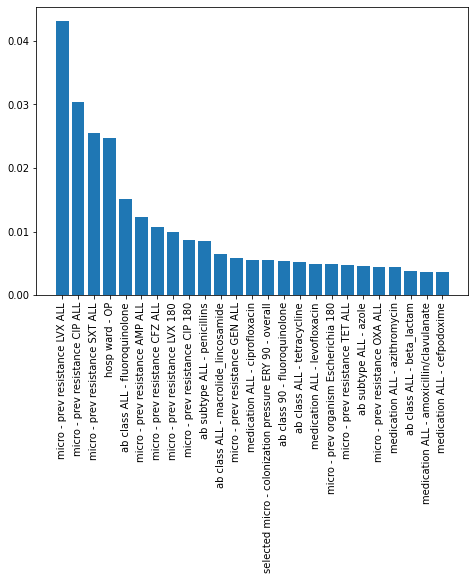

In [225]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(indexlistNG[:25],vallistNG[:25])
plt.show()

c:\Users\mt01034\Anaconda3\envs\tf-env\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: x and y must have same first dimension, but have shapes (790,) and (2,)

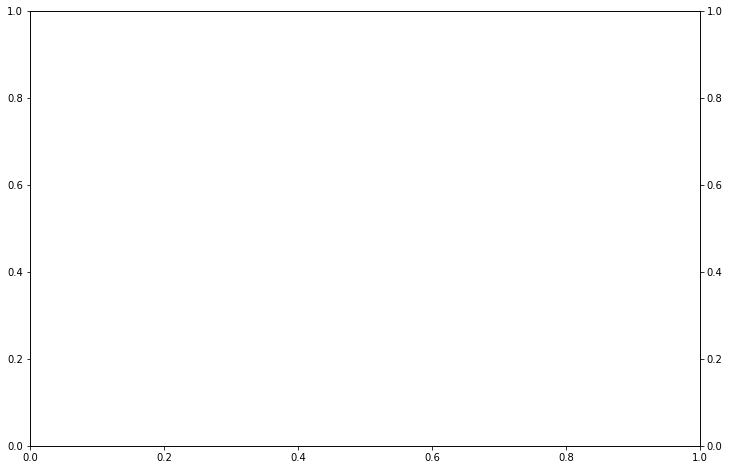

In [193]:
alphas = np.linspace(0, time_steps, time_steps)
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()
ax2.plot(alphas, (listoftupleNG[1]), color="blue")
ax2.set_ylabel("gradients", color="blue", fontsize=14)
ax1.set_xlabel("alphas", fontsize=14)
#plt.title(f"Graph for {X.columns}", fontsize=14)

In [ ]:
test_data_reshaped = x_test_tfidf[1].reshape(1,time_steps,input_dimension)
#grads=get_gradients(test_data_reshaped, top_pred_idx=0)
igrads = get_integrated_gradients(test_data_reshaped, top_pred_idx=0, num_steps=50)
avg_grads = tf.reduce_mean(igrads, axis=0)
#sumigrad=[0]
#for igrad in igrads:
#    sumigrad=tf.add(sumigrad, igrad)



In [ ]:
alphas = np.linspace(0, time_steps, time_steps)
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()
ax2.plot(alphas, (avg_grads), color="blue")
ax2.set_ylabel("gradients", color="blue", fontsize=14)
ax1.set_xlabel("alphas", fontsize=14)
#plt.title(f"Graph for {X.columns}", fontsize=14)

In [ ]:
alphas = np.linspace(0, 1, 50)
feat_n = 2  # age feature
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()
ax2.plot(alphas, abs(igrads[:, feat_n]), color="blue")
ax2.set_ylabel("gradients", color="blue", fontsize=14)
ax2.set_ylim(-0.002, 0.1)
ax1.set_xlabel("alphas", fontsize=14)
plt.title(f"Graph for {X.columns[feat_n]}", fontsize=14)

In [ ]:
test_data_reshaped.shape

In [ ]:
test_data_reshaped[0].shape